   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  GlobalSales  Global_Sales  
0     41.49     29.02      3.77         8.46        82.74      1.000000  
1     29.08      3.58      6.81         0.77        40.24      0.486281  
2     15.85     12.88      3.79         3.31        35.82      0.432854  
3     15.75     11.01      3.28         2.96        33.00      0.398767  
4     11.27      8.89     10.22         1.00        31.37      0.379064  
Dataset Shape: (16291, 12)
               Rank          Year      NA_Sales      EU_Sale

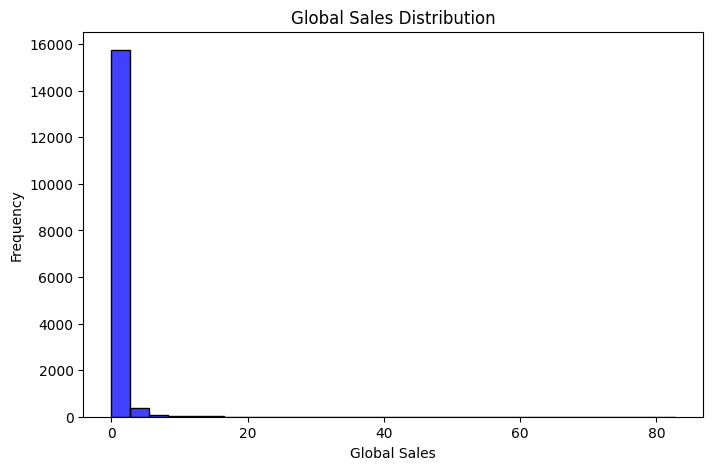

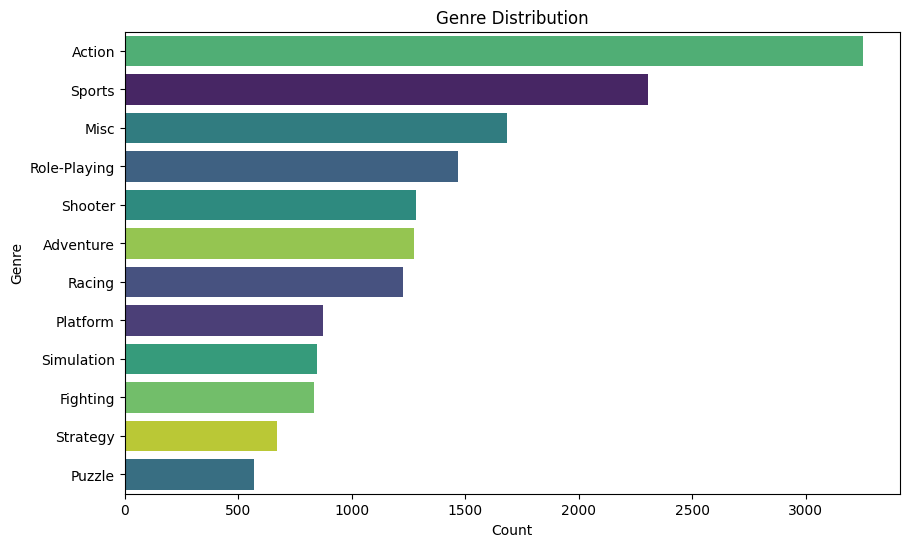

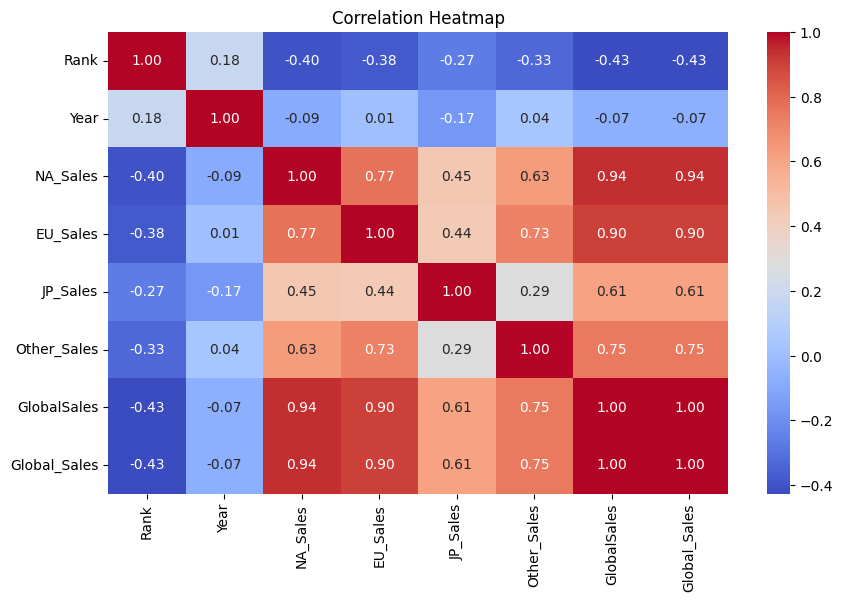

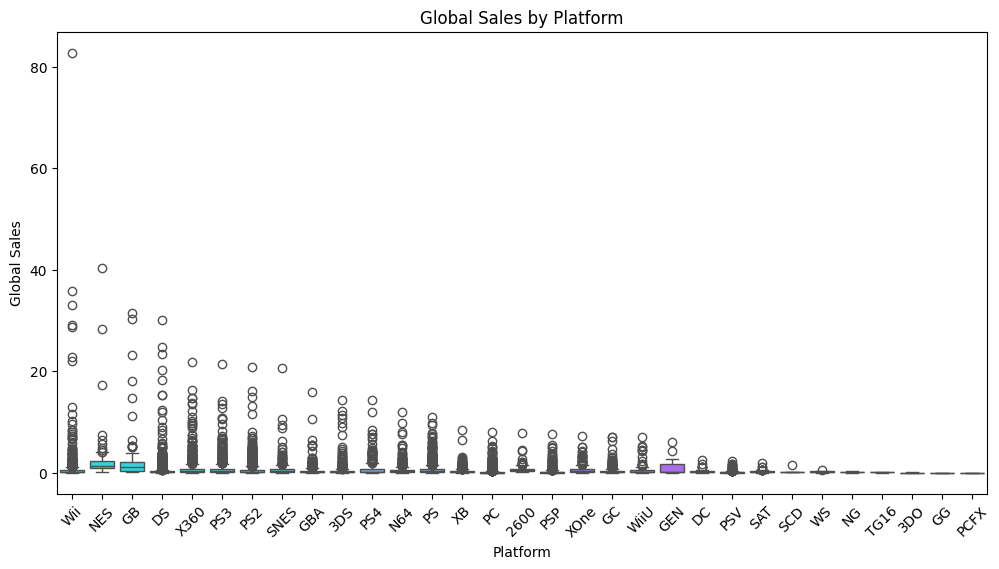

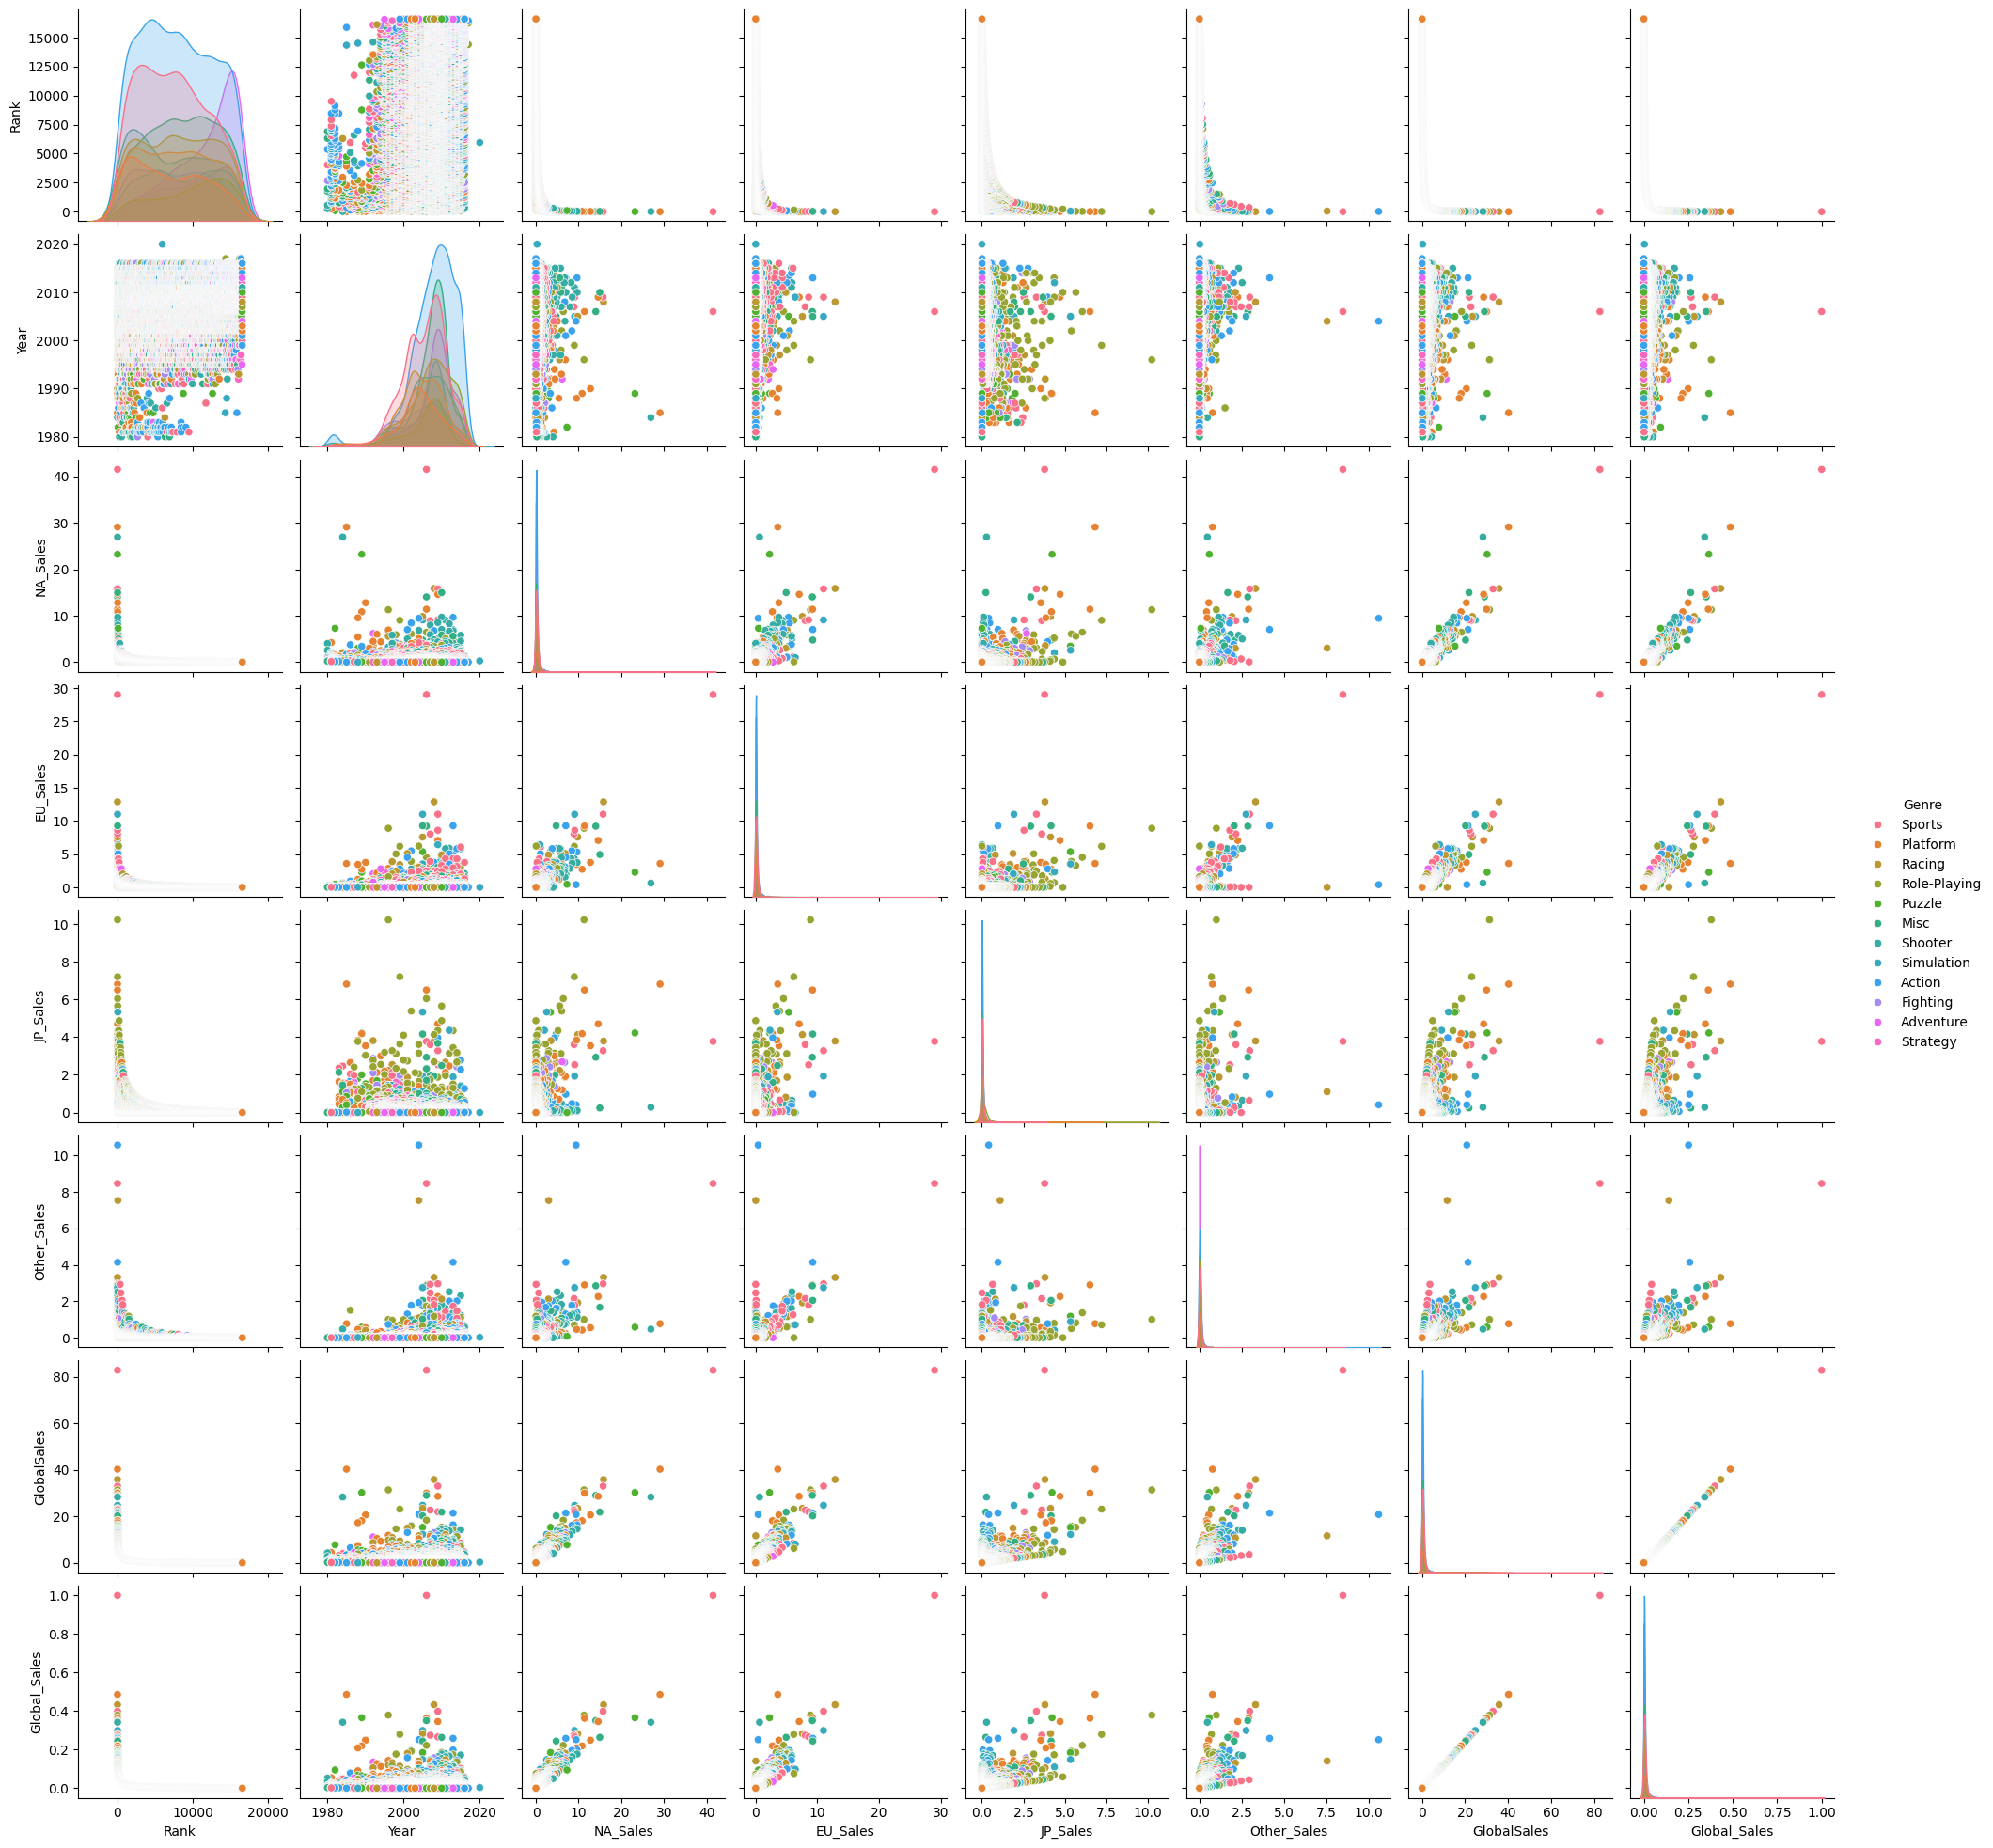

Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.91
PS       727.39
GBA      305.62
PSP      291.71
PS4      278.10
PC       254.70
Name: GlobalSales, dtype: float64
2008.0 678.9


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "curated_video_game_sales.csv"
data = pd.read_csv(file_path)


print (data.head())


print (f"Dataset Shape: {data.shape}")

print(data.describe())

print(data['Genre'].value_counts())
print(data['Platform'].value_counts())

plt.show()

plt.figure(figsize = (8, 5))
sns.histplot(data['GlobalSales'], kde = False, bins = 30, color = 'blue')
plt.title('Global Sales Distribution')
plt.xlabel('Global Sales')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize = (10, 6))
sns.countplot(y=data['Genre'], order=data['Genre'].value_counts().index,hue=data['Genre'], palette='viridis', legend=False)
plt.title('Genre Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

numeric_data = data.select_dtypes(include = ['float64', 'int64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Platform', y='GlobalSales', data=data, hue=data['Platform'], palette='cool', legend=False)
plt.title('Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.xticks(rotation=45)
plt.show()

sns.pairplot(data, hue='Genre', palette='husl', diag_kind='kde')
plt.show()


top_platforms =  data.groupby('Platform')['GlobalSales'].sum().sort_values(ascending=False).head(10)
print(top_platforms)

sales_by_year = data.groupby('Year')['GlobalSales'].sum()
print(sales_by_year.idxmax(), sales_by_year.max())